Random forest is an ensembel technique. which used multiple decision tree. Let's understand with an very good example:
Suppose, you have a dataset that contains 1000 rows. You assign 5 decision tree and you decide you will give 300 rows each decision tree. This will happen random sampling. Three way to do random sampling, they are:

1) row sampling

2) column sampling

3) row and column sampling

`Another two type of sampling:`

1) row or column sampling with repalcement (one row can be occur multiple time)

2) row or column sampling without replacement (one row occur only one time)

Using this 300 rows you will train your decision tree. When new test data or point will be come you will give this to the all decsion tree and they will predict and output. If it is classification  problem then output will be 0 or 1. Then we will apply voting. If number of output 1 is more then output will be 1 and vise=versa. For regrission problem we just take the mean value.

In [1]:
import numpy as np
import pandas as pd
import random
import sklearn
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')

In [2]:
print("version numpy:",np.__version__)
print("version pandas:",pd.__version__)
print("version sklear:",sklearn.__version__)
print("version matplotlib:",sklearn.__version__)

# version numpy: 1.24.1
# version pandas: 1.5.2
# version sklear: 1.2.0
# version matplotlib: 1.2.0

version numpy: 1.24.1
version pandas: 1.5.2
version sklear: 1.2.0
version matplotlib: 1.2.0


n_samples: number of rows

n_features: number of columns
    
n_informative : int, default=2
    The number of informative features. Each class is composed of a number
    of gaussian clusters each located around the vertices of a hypercube
    in a subspace of dimension ``n_informative``. For each cluster,
    informative features are drawn independently from  N(0, 1) and then
    randomly linearly combined within each cluster in order to add
    covariance. The clusters are then placed on the vertices of the
    hypercube.

n_redundant : int, default=2
    The number of redundant features. These features are generated as
    random linear combinations of the informative features.

n_repeated : int, default=0
    The number of duplicated features, drawn randomly from the informative
    and the redundant features.

n_classes : int, default=2
    The number of classes (or labels) of the classification problem.

n_clusters_per_class : int, default=2
    The number of clusters per class.

In [3]:
# make toy dataset

X, y = make_classification(n_samples=100, n_features=5, n_informative=5, n_redundant=0, n_clusters_per_class=1)

In [4]:
X.shape

(100, 5)

In [5]:
type(X)

numpy.ndarray

In [6]:
X.ndim

2

In [7]:
y

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [8]:
# Create dataframe

df = pd.DataFrame(data=X, columns=['col1','col2','col3','col4','col5'])

df["target"] = y

In [9]:
df.head()

,col1,col2,col3,col4,col5,target
0,1.299273,1.697877,1.594683,-0.589325,-0.473122,1
1,2.359186,2.375932,0.166922,-0.183295,2.457595,0
2,0.353580,0.537795,0.337908,-0.659744,-0.426094,1
3,0.925370,1.281563,0.549417,0.067674,0.448080,0
4,0.083152,1.856219,0.229615,-0.557914,-1.770229,1


### Apply row sampling

In [10]:
# function for row sampling with replacement

def sample_rows(df, percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [11]:
# create our model

tree1 = DecisionTreeClassifier()
tree2 = DecisionTreeClassifier()
tree3 = DecisionTreeClassifier()

In [12]:
df2 = sample_rows(df, 0.2)

df2

,col1,col2,col3,col4,col5,target
6,-1.020511,3.195873,2.090930,-1.283801,-2.399772,1
47,2.227416,2.354978,0.068726,-0.876555,-2.871565,1
98,0.664053,1.553824,0.320528,-3.021912,0.885366,0
97,0.383216,1.606188,-0.499905,-0.780731,1.497626,0
55,2.542754,2.624253,-0.469755,-1.014868,2.215618,0
23,0.364054,1.213246,-0.393646,-1.969158,1.224036,0
14,-0.458305,0.446473,-0.583562,-0.586006,-0.698311,1
52,0.500360,-0.548161,1.536851,-1.665579,-1.797114,1
67,0.174026,-1.297551,3.311259,-3.605014,-1.074984,0
34,1.706253,2.134751,0.168003,-1.485866,0.773390,0


In [13]:
df3 = sample_rows(df, 0.2)
df4 = sample_rows(df, 0.2)

In [14]:
tree1.fit(X=df2.iloc[:, 0:-1].values, y=df2.iloc[:, -1].values)
tree2.fit(X=df3.iloc[:, 0:-1].values, y=df3.iloc[:, -1].values)
tree3.fit(X=df4.iloc[:, 0:-1].values, y=df4.iloc[:, -1].values)

DecisionTreeClassifier()

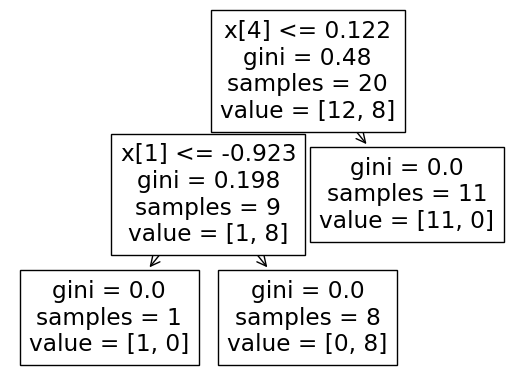

In [15]:
plot_tree(decision_tree=tree1)
plt.show()

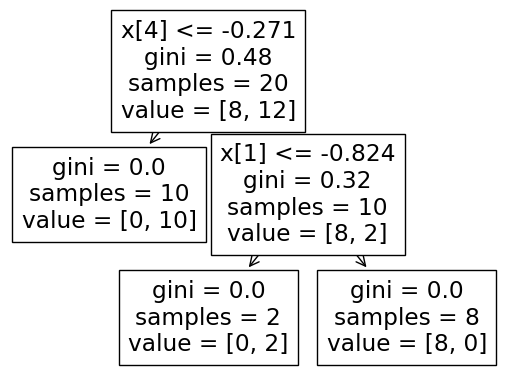

In [16]:
plot_tree(decision_tree=tree2)
plt.show()

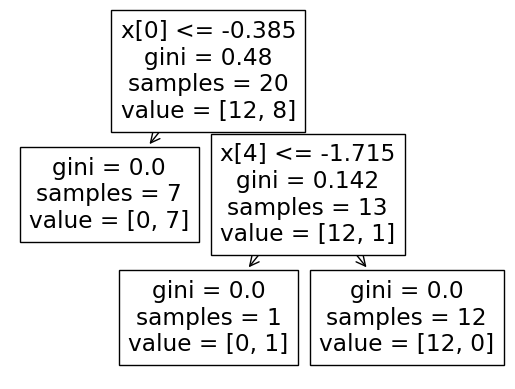

In [17]:
plot_tree(decision_tree=tree3)
plt.show()

In [18]:
tree1.predict(X=np.array([-2.430824, -1.979199, -1.552550, 0.641325, -1.059250]).reshape(1,5))

array([0])

In [19]:
tree2.predict(X=np.array([-2.430824, -1.979199, -1.552550, 0.641325, -1.059250]).reshape(1,5))

array([1])

In [20]:
tree3.predict(X=np.array([-2.430824, -1.979199, -1.552550, 0.641325, -1.059250]).reshape(1,5))

array([1])

#### `The mejority count 1`

### Apply column sampling

In [21]:
random.sample(df.columns.tolist()[:-1], int(0.5*(df.shape[1]-1)))

['col1', 'col4']

In [22]:
df.shape[1]-1

5

In [23]:
df.columns.tolist()[:-1]

['col1', 'col2', 'col3', 'col4', 'col5']

In [24]:
# function for feature sampling with replacement

def sample_features(df, percent):
    cols = random.sample(population=df.columns.tolist()[:-1], k=int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df["target"]
    return new_df

In [25]:
df2 = sample_features(df, 0.8)
df2.head()

,col1,col2,col3,col5,target
0,1.299273,1.697877,1.594683,-0.473122,1
1,2.359186,2.375932,0.166922,2.457595,0
2,0.353580,0.537795,0.337908,-0.426094,1
3,0.925370,1.281563,0.549417,0.448080,0
4,0.083152,1.856219,0.229615,-1.770229,1


In [26]:
df3 = sample_features(df, 0.8)
df4 = sample_features(df, 0.8)

In [27]:
# create our model

tree4 = DecisionTreeClassifier()
tree5 = DecisionTreeClassifier()
tree6 = DecisionTreeClassifier()

In [28]:
tree4.fit(X=df2.iloc[:, 0:-1].values, y=df2.iloc[:, -1].values)
tree5.fit(X=df3.iloc[:, 0:-1].values, y=df3.iloc[:, -1].values)
tree6.fit(X=df4.iloc[:, 0:-1].values, y=df4.iloc[:, -1].values)

DecisionTreeClassifier()

In [29]:
tree4.predict(X=np.array([-1.295755, 2.420607, -0.922495, 0.752375]).reshape(1,4))

array([1])

In [30]:
tree5.predict(X=np.array([-1.295755, 2.420607, -0.922495, 0.752375]).reshape(1,4))

array([0])

In [31]:
tree5.predict(X=np.array([-1.295755, 2.420607, -0.922495, 0.752375]).reshape(1,4))

array([0])

#### If you want to can apply combine sampling

In [32]:
# function for combined sampling

def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [33]:
# if replace=True then it will apply without replacement
df.sample(n=4, replace=True)

,col1,col2,col3,col4,col5,target
57,-1.393605,1.473669,1.415379,-1.545434,-2.445713,1
10,1.180104,0.148790,2.574062,-3.594942,-0.626018,0
40,-0.383822,-0.427709,0.587856,-0.367044,-0.277228,0
9,-0.991033,0.481750,1.710977,-0.700749,0.305794,1


https://scikit-learn.org/stable/modules/generated/sklearn.utils.random.sample_without_replacement.html

In [36]:
from sklearn.utils.random import sample_without_replacement

In [39]:
sample_without_replacement(df.shape[0], df.shape[0]*0.5)

array([ 6, 72, 45, 63, 52, 32, 97, 23, 14, 22, 80, 21, 58, 94, 70, 25, 84,
       77, 73,  3, 31, 48, 51, 92, 90, 66, 68, 69, 41, 13, 76, 99, 37, 29,
       83, 43, 38, 42, 17, 98, 71, 95, 54, 53, 85, 46, 93, 34, 64, 62])